# Seção de Importação


In [67]:
!wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip  -O /tmp/horse-or-human.zip



--2022-04-30 18:31:34--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.157.128, 142.251.8.128, 64.233.189.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.157.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   206MB/s    in 0.7s    

2022-04-30 18:31:35 (206 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [68]:
!wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip  -O /tmp/validation-horse-or-human.zip



--2022-04-30 18:31:35--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.125.128, 142.250.157.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  16.5MB/s    in 0.7s    

2022-04-30 18:31:36 (16.5 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



In [69]:
import os
import zipfile
 
local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

In [70]:
#arquivos para a validação

local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

In [71]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')


 
# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')


In [72]:
#arquivos para a validação

test_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')
test_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

# Seção de visualização dos dados

In [41]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])
train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse22-0.png', 'horse22-2.png', 'horse14-6.png', 'horse21-7.png', 'horse35-3.png', 'horse31-2.png', 'horse33-3.png', 'horse26-3.png', 'horse08-4.png', 'horse24-4.png']
['human04-19.png', 'human07-24.png', 'human10-08.png', 'human14-05.png', 'human14-24.png', 'human11-13.png', 'human04-05.png', 'human10-07.png', 'human03-23.png', 'human12-07.png']


In [42]:
test_horse_names = os.listdir(test_horse_dir)
print(test_horse_names[:10])
test_human_names = os.listdir(test_human_dir)
print(test_human_names[:10])

['horse5-018.png', 'horse2-412.png', 'horse1-568.png', 'horse6-064.png', 'horse5-100.png', 'horse6-089.png', 'horse2-224.png', 'horse3-011.png', 'horse4-530.png', 'horse1-127.png']
['valhuman03-10.png', 'valhuman05-06.png', 'valhuman04-19.png', 'valhuman01-10.png', 'valhuman02-01.png', 'valhuman02-20.png', 'valhuman04-06.png', 'valhuman02-04.png', 'valhuman01-07.png', 'valhuman05-21.png']


In [43]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


In [44]:
print('total training horse images:', len(os.listdir(test_horse_dir)))
print('total training human images:', len(os.listdir(test_human_dir)))

total training horse images: 128
total training human images: 128


In [45]:
%matplotlib inline
 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
 
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4
 
# Index for iterating over images
pic_index = 0

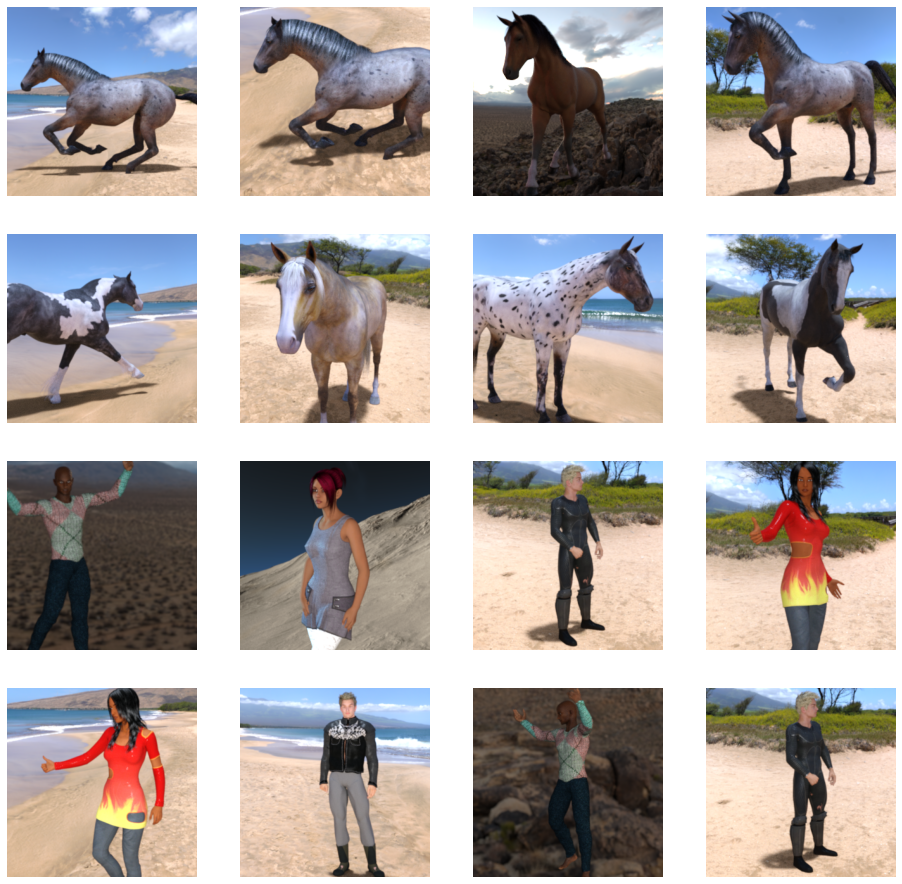

In [46]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
 
pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]
 
for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)
 
  img = mpimg.imread(img_path)
  plt.imshow(img)
 
plt.show()
 

# Seção de Treinamento

In [47]:
import tensorflow as tf

In [48]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 149, 149, 16)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 35, 35, 64)      

In [50]:
from tensorflow.keras.optimizers import RMSprop
 
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [51]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
 
# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.


In [ ]:
epochs_hist = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1)

# Seção de Teste/Validação

In [65]:
import numpy as np
from keras.preprocessing import image

def pred_human_horse(model, horse_or_human):
  test_image = image.load_img(horse_or_human, target_size = (300, 300))
  test_image = image.img_to_array(test_image)/255
  test_image = np.expand_dims(test_image, axis = 0)

  result = model.predict(test_image).round(3)

  pred = np.argmax(result)
  print(horse_or_human,"--->", result)

  if result>0.5:
    print('Predicted>>> Human')
  else:
    print('Predicted>>> Horse')

In [66]:
import os

lista_val = [os.path.join(test_horse_dir, nome) for nome in os.listdir(test_horse_dir)]

for horse_or_human in lista_val:
  pred_human_horse(model, horse_or_human)

/tmp/validation-horse-or-human/horses/horse5-018.png ---> [[0.014]]
Predicted>>> Horse
/tmp/validation-horse-or-human/horses/horse2-412.png ---> [[1.]]
Predicted>>> Human
/tmp/validation-horse-or-human/horses/horse1-568.png ---> [[0.]]
Predicted>>> Horse
/tmp/validation-horse-or-human/horses/horse6-064.png ---> [[0.253]]
Predicted>>> Horse
/tmp/validation-horse-or-human/horses/horse5-100.png ---> [[0.]]
Predicted>>> Horse
/tmp/validation-horse-or-human/horses/horse6-089.png ---> [[0.849]]
Predicted>>> Human
/tmp/validation-horse-or-human/horses/horse2-224.png ---> [[0.]]
Predicted>>> Horse
/tmp/validation-horse-or-human/horses/horse3-011.png ---> [[0.]]
Predicted>>> Horse
/tmp/validation-horse-or-human/horses/horse4-530.png ---> [[0.]]
Predicted>>> Horse
/tmp/validation-horse-or-human/horses/horse1-127.png ---> [[0.001]]
Predicted>>> Horse
/tmp/validation-horse-or-human/horses/horse3-521.png ---> [[0.879]]
Predicted>>> Human
/tmp/validation-horse-or-human/horses/horse3-099.png ---> [[0

In [ ]:
lista_val = [os.path.join(test_human_dir, nome) for nome in os.listdir(test_human_dir)]

for horse_or_human in lista_val:
  pred_human_horse(model, horse_or_human)

# Gráfico de Métricas de Desempenho

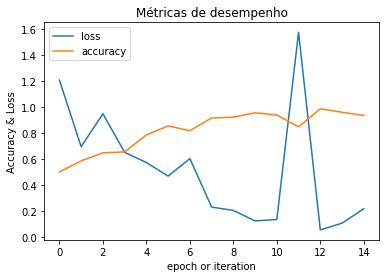

In [56]:
import pandas as pd

history_df = pd.DataFrame(epochs_hist.history)

history_df['loss'].plot();
history_df['accuracy'].plot();

plt.title('Métricas de desempenho')
plt.ylabel('Accuracy & Loss')
plt.xlabel('epoch or iteration')
plt.legend(["loss", 'accuracy'], loc = 'upper left')
plt.show()

# Features Extras Interessantes

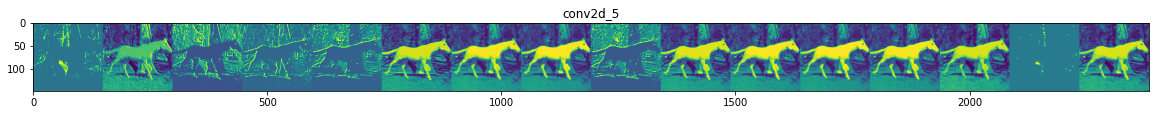

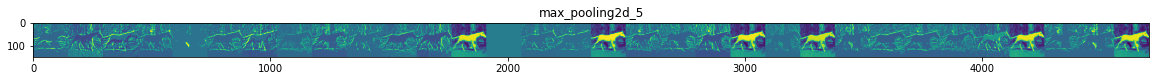

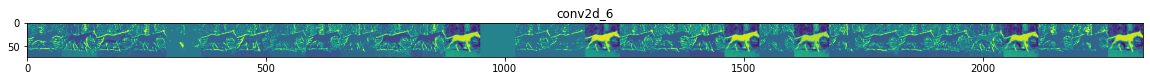

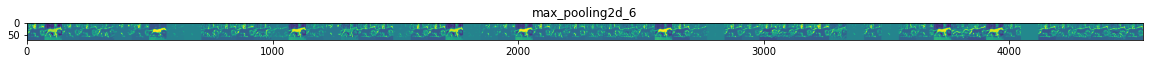

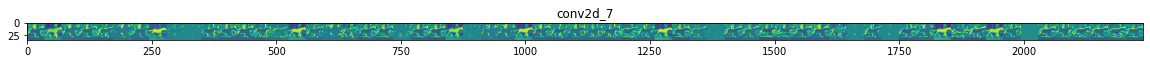

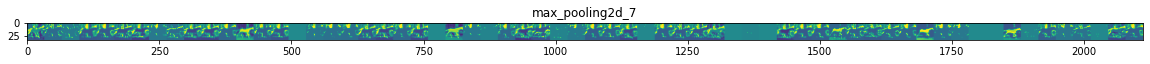

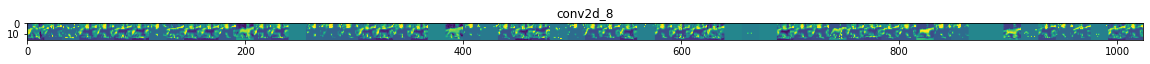

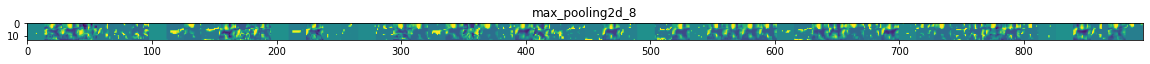

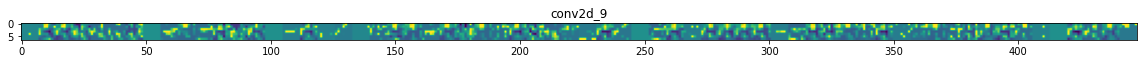

In [58]:
#Visualização das layers

import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
 
# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)
 
img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)
 
# Rescale by 1/255
x /= 255
 
# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)
 
# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]
 
# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      if x.std()>0:
        x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [57]:
#teste passando um arquivo qualquer sem necessidade de alteração do código

import numpy as np
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving horse6-218.png to horse6-218.png
[0.]
horse6-218.png is a horse
